In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

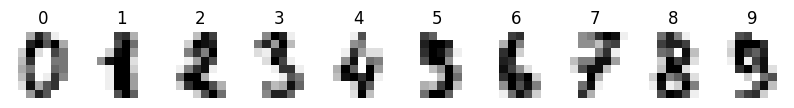

In [2]:
number = load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, number.images, number.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(label)


In [3]:
X = number.images.reshape((len(number.images), -1))
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
X_temp, X_test, y_temp, y_test = train_test_split(X, number.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(718, 64)
(719, 64)
(360, 64)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [6]:
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}
svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']})

In [7]:
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

In [8]:
best_svm_model.fit(X_train, y_train)

SVC(C=10, gamma='auto')

In [9]:
val_predictions = best_svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation accuracy:", val_accuracy)
print("Best Parameters:", best_params)

Validation accuracy: 0.9819193324061196
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [10]:
test_predictions = best_svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test accuracy after re-training:", test_accuracy)

Test accuracy after re-training: 0.9777777777777777


In [11]:
class_report = classification_report(y_test, test_predictions)
print("Classification Report on Test Set:\n", class_report)

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.94      1.00      0.97        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



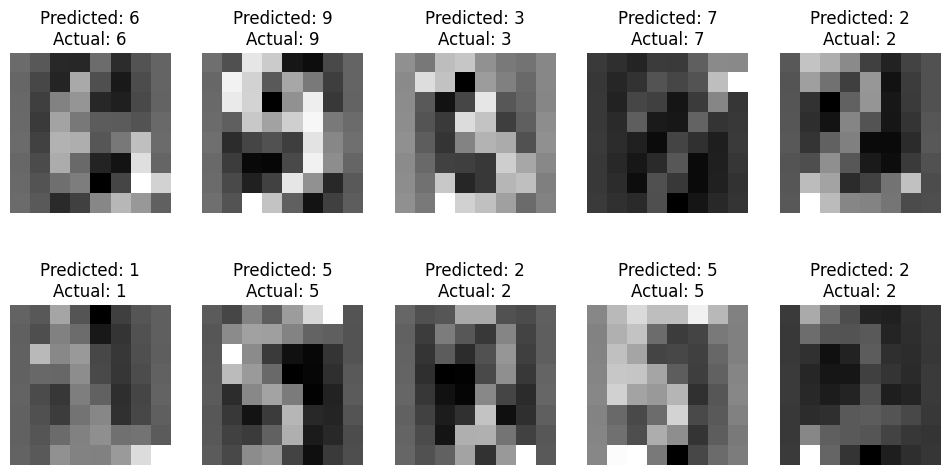

In [12]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')  # Reshape to 8x8 for display
    plt.title(f"Predicted: {int(test_predictions[i])}\nActual: {int(y_test[i])}")
    plt.axis('off')
plt.show()

Confusion matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  1 33  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 32  0  1]
 [ 0  0  1  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  0  1 38]]


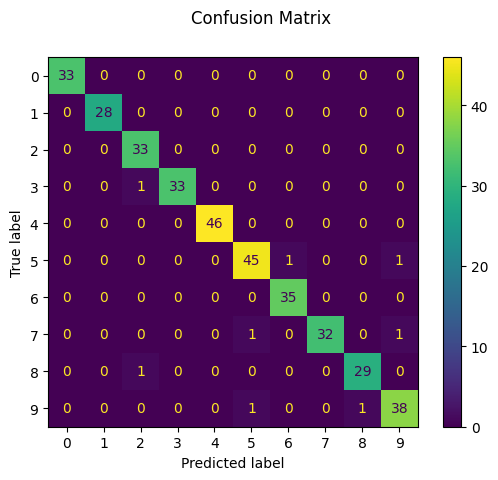

In [13]:
from sklearn import metrics

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

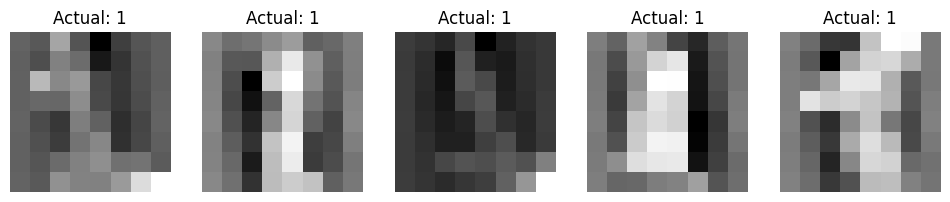

In [14]:
user_input = input("Masukkan angka dari 0 sampai 9: ")

try:
    user_input = int(user_input)
    if 0 <= user_input <= 9:
        selected_digits = X_test[y_test == user_input][:5]
        selected_labels = y_test[y_test == user_input][:5]

        plt.figure(figsize=(12, 6))
        for i in range(len(selected_digits)):
            plt.subplot(1, 5, i + 1)
            plt.imshow(selected_digits[i].reshape(8, 8), cmap='gray')
            plt.title(f"Actual: {int(selected_labels[i])}")
            plt.axis('off')
        plt.show()

    else:
        print("Input tidak valid. Harap masukkan angka dari 0 sampai 9.")
except ValueError:
    print("Input tidak valid. Harap masukkan angka yang valid.")